# <font color = 'pickle'> **Exploding Gradients**

In [ ]:
 h1  = xw
 h2 = h1w1
 h2 = xww1

In [1]:
import torch
W = torch.normal(0, 1, size=(4, 4))
print(f'Initial single matrix \n {W}')
for i in range(50):
    W = torch.mm(W, torch.normal(0, 1, size=(4, 4)))

print(f'\nAfter 50 matrix multiplications\n {W}')

for i in range(100):
    W = torch.mm(W, torch.normal(0, 1.5, size=(4, 4)))

print(f'\nAfter 150 matrix multiplications\n {W}')

Initial single matrix 
 tensor([[-1.3278, -0.2303,  0.8788, -0.8850],
        [-0.3217, -1.3044,  0.3161, -2.7423],
        [-0.5705, -3.9007,  1.7741,  1.0324],
        [ 0.2772, -1.0529,  1.7441,  0.0798]])

After 50 matrix multiplications
 tensor([[ 2.6474e+11, -1.5432e+11,  1.5637e+11,  7.4833e+10],
        [-3.4903e+11,  2.0349e+11, -2.0620e+11, -9.8631e+10],
        [-2.3904e+12,  1.3932e+12, -1.4116e+12, -6.7597e+11],
        [-1.1184e+12,  6.5188e+11, -6.6050e+11, -3.1622e+11]])

After 150 matrix multiplications
 tensor([[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]])


# <font color = 'pickle'>**Sigmoid Activation Function**

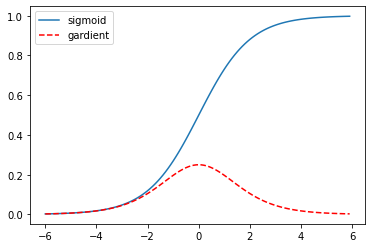

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-6.0, 6.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

plt.plot(x.detach().numpy(),y.detach().numpy(),label='sigmoid')
plt.plot(x.detach().numpy(),x.grad.numpy(),label='gardient',linestyle='dashed',color='r')
plt.legend()
plt.show()


# <font color = 'pickle'>**Vanishing Gradient Problem**

In [2]:
import torch
W = torch.normal(0, 1, size=(4, 4))
print(f'Initial single matrix \n {W}')
for i in range(10):
    W = torch.mm(W, torch.normal(0, 1, size=(4, 4))*0.01)

print(f'\nAfter 10 matrix multiplications\n {W}')

for i in range(90):
    W = torch.mm(W, torch.normal(0, 1.5, size=(4, 4))*0.01)

print(f'\nAfter 100 matrix multiplications\n {W}')

Initial single matrix 
 tensor([[-1.0561, -1.6351, -0.4038,  0.2338],
        [-0.7867,  0.0729, -3.4616,  1.1025],
        [ 0.6467,  0.5220,  0.4990,  1.1507],
        [-0.9379, -0.6342, -0.8665, -0.7687]])

After 10 matrix multiplications
 tensor([[ 1.1458e-17,  6.3584e-18, -1.5347e-17, -4.3658e-18],
        [ 1.0896e-17,  4.5358e-18, -1.8699e-17, -1.7355e-18],
        [-8.0996e-18, -2.8946e-18,  1.5116e-17,  5.5154e-19],
        [ 1.0406e-17,  4.2135e-18, -1.8114e-17, -1.4885e-18]])

After 100 matrix multiplications
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


# <font color = 'pickle'>**Understanding Variance**

In [3]:
import torch
import math
torch.manual_seed(0)
x = torch.randn(512)
w = torch.randn(512,512)
x.mean(), x.std()

(tensor(0.0625), tensor(1.0160))

In [ ]:
y = w1x1 + w2x2

<font color = 'indianred'>Variance of output depends on the input size of the weight matrix. The shape of the weight matrix is (output_size, input_size).

$Var(X + Y) ~ = ~ Var(X) + Var(Y) ~~~ \text{ if } X \text{ and } Y \text{ are independent}$

Output is weighted sum of inputs. Let us say we have N inputs. If we initialize weights with variance 1 then the output will have variance N.


In [4]:
# assume Output size is same as input size
def var_output(input_size,output_size):
  mean,var = 0.,0.
  for i in range(1000):
      x = torch.randn(input_size)
      w = torch.randn(output_size, input_size)
      y = x@w.T # b, input size input, output

      # y = w1xi + w2x2 ++= wmxn
      
      mean += y.mean().item()
      var += (y**2).mean().item()
  return mean/1000,var/1000

In [5]:
var_output(300,10)

(0.04992374694580212, 305.3357342262268)

In [6]:
var_output(500,10)

(-0.01298970144148916, 500.62665928649903)

In [7]:
# Store mean and variance for various input sizes
torch.manual_seed(0)
var_=[]
mean_=[]
input_size=[]
output_size = 10
for input in torch.arange(start=100,end=1000,step=50,dtype=int):
  input_size.append(input.item())
  m,v= var_output(input.item(),output_size)
  mean_.append(m)
  var_.append(v)

In [8]:
import pandas as pd

In [9]:
pd.DataFrame({'input_size': input_size,'var':var_,'mean':mean_})

,input_size,var,mean
0,100,99.156085,0.013808
1,150,153.103809,-0.082100
2,200,199.883551,0.070397
3,250,251.298590,0.070737
4,300,300.093785,-0.117624
5,350,347.964811,0.077519
6,400,403.034579,-0.100612
7,450,449.359897,0.273781
8,500,487.205641,-0.180320
9,550,541.264790,0.424094


In [10]:
import matplotlib.pyplot as plt


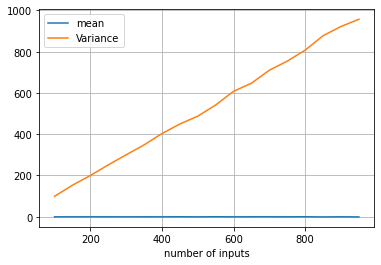

In [11]:
plt.plot(input_size,mean_, label='mean')
plt.plot(input_size,var_, label='Variance')
plt.xlabel('number of inputs')
plt.grid(True)
plt.legend()
plt.show()

# <font color = 'pickle'>**Change weight initialization**

In [12]:
# assume Output size is same as input size
def var_output(input_size,output_size):
  mean,var = 0.,0.
  for i in range(1000):
      x = torch.randn(input_size)
      w = torch.randn(output_size, input_size)/math.sqrt(input_size)
      y = x @ w.T
      mean += y.mean().item()
      var += (y**2).mean().item()
  return mean/1000,var/1000

In [13]:
import math
torch.manual_seed(0)
var_=[]
mean_=[]
input_size=[]
output_size = 10
for input in torch.arange(start=100,end=1000,step=50,dtype=int):
  input_size.append(input.item())
  m,v= var_output(input.item(),output_size)
  mean_.append(m)
  var_.append(v)

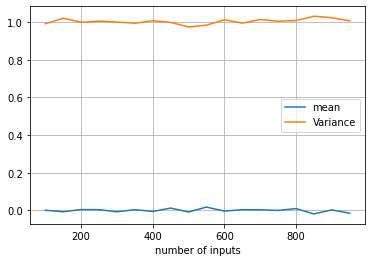

In [14]:
plt.plot(input_size,mean_, label='mean')
plt.plot(input_size,var_, label='Variance')
plt.xlabel('number of inputs')
plt.grid(True)
plt.legend()
plt.show()

# <font color = 'pickle'>**Initialization for ReLu activation function**

In [ ]:
import torch.nn.functional as F

In [ ]:
# assume Output size is same as input size
def var_output(input_size,output_size):
  mean,var = 0.,0.
  for i in range(1000):
      x = torch.randn(input_size)
      w = torch.randn(output_size, input_size)
      y = F.relu(x@w.T)
      mean += y.mean().item()
      var += (y**2).mean().item()
  return mean/1000,var/1000

In [ ]:
torch.manual_seed(0)
var_=[]
mean_=[]
input_size=[]
output_size = 10
for input in torch.arange(start=100,end=1000,step=50,dtype=int):
  input_size.append(input.item())
  m,v= var_output(input.item(),output_size)
  mean_.append(m)
  var_.append(v)

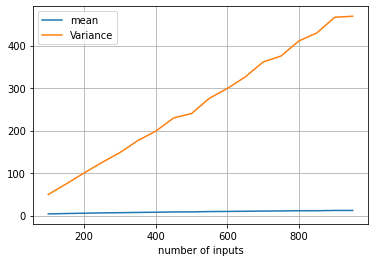

In [ ]:
plt.plot(input_size,mean_, label='mean')
plt.plot(input_size,var_, label='Variance')
plt.xlabel('number of inputs')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# assume Output size is same as input size
def var_output(input_size,output_size):
  mean,var = 0.,0.
  for i in range(1000):
      x = torch.randn(input_size)
      w = torch.randn(output_size, input_size)/(math.sqrt(input_size/2))
      y = F.relu(w @ x)
      mean += y.mean().item()
      var += (y**2).mean().item()
  return mean/1000,var/1000

In [ ]:
torch.manual_seed(0)
var_=[]
mean_=[]
input_size=[]
output_size = 10
for input in torch.arange(start=100,end=1000,step=50,dtype=int):
  input_size.append(input.item())
  m,v= var_output(input.item(),output_size)
  mean_.append(m)
  var_.append(v)

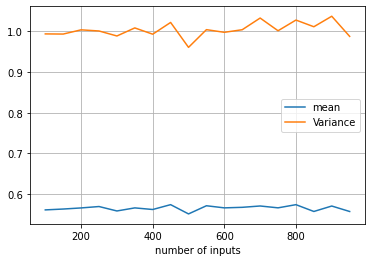

In [ ]:
plt.plot(input_size,mean_, label='mean')
plt.plot(input_size,var_, label='Variance')
plt.xlabel('number of inputs')
plt.grid(True)
plt.legend()
plt.show()

# <font color = 'pickle'>**Leaky ReLU Activation Function**

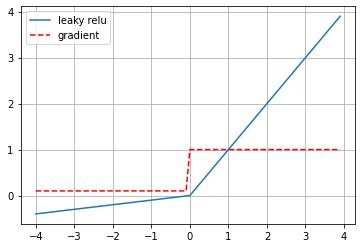

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.arange(-4.0, 4.0, 0.1, requires_grad=True)
y = F.leaky_relu(x, negative_slope=0.1)
y.backward(torch.ones_like(x))

plt.plot(x.detach().numpy(),y.detach().numpy(),label='leaky relu')
plt.plot(x.detach().numpy(),x.grad.numpy(),label='gradient',linestyle='dashed',color='r')
plt.legend()
plt.grid()
plt.show()